In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

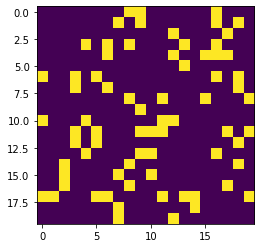

In [ ]:

DimensionX = 20
DimensionY = 20 #Dimensiones del array
Grid  = np.zeros((DimensionX,DimensionY)) #Nombbre y creación del primer arra lleno de ceros.
print (Grid)

np.random.seed()

#Veremos cuantos punttos colocar como vivos:

a = np.random.randint(1,DimensionX*DimensionY)


#Generamos a posiciones aleatorias
pos_alea =  []#Crearemos una lista cuyos elementos serán las funciones aleatorias a utilizar:
for i in range (a):
  coor1=np.random.randint(0,DimensionX)
  coor2=np.random.randint(0,DimensionY)
  pos_alea.append([coor1,coor2]) 

#print(pos_alea) #(se imprime la lista de las posiciones aleatorias si se quiere).
print("Ahora las células vivas modificarán la forma de la matriz anterior de la forma:")

for i in range(len(pos_alea)):
  Grid[(pos_alea[i][0],pos_alea[i][1])] = 1 #Se asignan ahora 1's a la matriz Grind original llena de ceros.

print(Grid)

plt.figure()
plt.imshow(Grid)

In [ ]:
# Definir una funcion con la region entorno a la celda i,j

#Esta función genera una lista con los vecinos de la celda (i,j) de cualquier matriz que se introduzca:

def region_local(Grid,i,j):
  Vecinos = []
  if i%(DimensionX-1) != 0 and j%(DimensionY-1) != 0:
    for m in range(0,3):
      for k in range(0,3):
          Vecinos.append(Grid[(i-1+m,j-1+k)])        
  elif i%(DimensionX-1) == 0 and j%(DimensionY-1) == 0:
    for m in range(0,2):
      for k in range(0,2):
        Vecinos.append(Grid[(i-1+m,j-1+k)])       
  elif i%(DimensionX-1) == 0:
      for m in range(0,2):
        for k in range(0,3):
          Vecinos.append(Grid[(i-1+m,j-1+k)])  
  else: 
    for m in range(0,3):
      for k in range(0,2):
        Vecinos.append(Grid[(i-1+m,j-1+k)]) 

  return Vecinos

#print(region_local(Grid,0,0)) #Si se desea, la lista anterior se imprime en la consola para con la matriz Grid.


In [ ]:
# Definir funcion logica celda

def logica_celda(Grid,i,j): 
  local = region_local(Grid,i,j)
  local.remove(Grid[(i,j)])
  a = local.count(1)# Numero de células vecinas vivas.
  if Grid[(i,j)] == 1: #condición para si la célula en cuestión está viva.
    if a >= 4 or a <= 1:
      Grid[(i,j)] = 0 
  else: #Condición por si la célula en cuestión está muerta.
    if a >= 4 or a <=1:
      Grid[(i,j)] = 0
    elif a==3:
      Grid[(i,j)] = 1
  return Grid[(i,j)] 
  
'''
a = 5
b = 6
print(logica_celda(Grid,a,b))
'''#Se imprime una celda prueba por si se quiere (a debe ser menor que DimensionX y b debe ser menor que DimensionY)


'\na = 5\nb = 6\nprint(logica_celda(Grid,a,b))\n'

In [ ]:
def Ciclo(Grid): 
  Size = Grid.shape[0]
  for i in range(Size):
    for j in range(Size):
      Grid[i][j] = logica_celda(Grid,i,j)
  return Grid

print(Ciclo(Grid))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.

"\nanimacion.save('Juego_de_la_vida.gif', writer='pillow', fps=600)\nImage(url='Juego_de_la_vida.gif')"

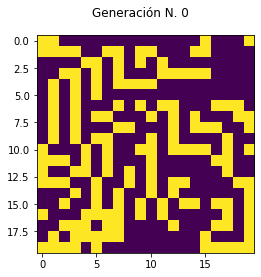

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML, Image
def Animar(i):
  Ciclo(Grid)
  ax1.clear()
  ax1.imshow(Grid)
  plt.suptitle('Generación N. {}'.format(i))
  

fig = plt.figure()
ax1 = fig.add_subplot()

animacion = animation.FuncAnimation(fig, Animar, interval=200,frames= 300)
animacion.save('Juego_de_la_vida.gif', writer='pillow', fps=600)
Image(url='Juego_de_la_vida.gif')
